<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>One-Hot Encoding</a></span></li><li><span><a href="#Train/Test-dataset-split" data-toc-modified-id="Train/Test-dataset-split-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Train/Test dataset split</a></span></li><li><span><a href="#표준화" data-toc-modified-id="표준화-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>표준화</a></span></li><li><span><a href="#정규화" data-toc-modified-id="정규화-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>정규화</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>SMOTE</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>AdaBoost</a></span><ul class="toc-item"><li><span><a href="#훈련-세트와-테스트-세트-간의-성능-비교" data-toc-modified-id="훈련-세트와-테스트-세트-간의-성능-비교-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>훈련 세트와 테스트 세트 간의 성능 비교</a></span></li><li><span><a href="#Cross-Validation-Score-for-AdaBoost" data-toc-modified-id="Cross-Validation-Score-for-AdaBoost-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Cross Validation Score for AdaBoost</a></span></li><li><span><a href="#학습-곡선(Learning-Curve)" data-toc-modified-id="학습-곡선(Learning-Curve)-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>학습 곡선(Learning Curve)</a></span></li><li><span><a href="#F-1.5,-F2-Score-추출" data-toc-modified-id="F-1.5,-F2-Score-추출-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>F 1.5, F2 Score 추출</a></span></li></ul></li><li><span><a href="#SGD" data-toc-modified-id="SGD-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>SGD</a></span></li><li><span><a href="#전체-모델-스코어-추출해보기" data-toc-modified-id="전체-모델-스코어-추출해보기-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>전체 모델 스코어 추출해보기</a></span><ul class="toc-item"><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></li></ul></li></ul></div>

In [258]:
import numpy as np
import pandas as pd
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import plotly.express as px 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import cufflinks as cf 
import warnings

In [259]:
warnings.filterwarnings('ignore')
cf.go_offline() 
init_notebook_mode(connected=True)

In [260]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [262]:
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
# 한글 텍스트를 제대로 표시하기 위해 'font.family' 사용
plt.rcParams['font.family'] = 'AppleGothic'

In [263]:
# csv 파일 불러오기
df = pd.read_csv('./data/Churn_final.csv')

In [264]:
df.head()

,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,0,NaN,3,1,1,2,Month-to-Month,1,39.65,59.65,1
1,74,1,Offer E,3,1,0,1,Month-to-Month,8,80.65,1024.10,1
2,71,3,Offer D,2,0,2,1,Month-to-Month,18,95.45,1910.88,1
3,78,1,Offer C,2,2,2,1,Month-to-Month,25,98.50,2995.07,1
4,80,1,Offer C,2,0,0,1,Month-to-Month,37,76.50,3102.36,1


In [265]:
# 'Membership' 컬럼의 결측치를 "None"으로 대체
df['Membership'].fillna('None', inplace=True)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   7043 non-null   int64  
 1   Number of Dependents  7043 non-null   int64  
 2   Membership            7043 non-null   object 
 3   Satisfaction Score    7043 non-null   int64  
 4   Tech services         7043 non-null   int64  
 5   Streaming services    7043 non-null   int64  
 6   Combined Product      7043 non-null   int64  
 7   Contract              7043 non-null   object 
 8   Tenure in Months      7043 non-null   int64  
 9   Monthly Charge        7043 non-null   float64
 10  Total Revenue         7043 non-null   float64
 11  Churn Value           7043 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 660.4+ KB


### One-Hot Encoding

In [267]:
# 데이터프레임에 원-핫 인코딩을 적용할 열 선택
cols_to_encode = ["Membership", "Contract"]

# 원-핫 인코딩 적용 (drop_first=True 추가)
df_encoded = pd.get_dummies(df, columns=cols_to_encode)

In [268]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      7043 non-null   int64  
 1   Number of Dependents     7043 non-null   int64  
 2   Satisfaction Score       7043 non-null   int64  
 3   Tech services            7043 non-null   int64  
 4   Streaming services       7043 non-null   int64  
 5   Combined Product         7043 non-null   int64  
 6   Tenure in Months         7043 non-null   int64  
 7   Monthly Charge           7043 non-null   float64
 8   Total Revenue            7043 non-null   float64
 9   Churn Value              7043 non-null   int64  
 10  Membership_None          7043 non-null   bool   
 11  Membership_Offer A       7043 non-null   bool   
 12  Membership_Offer B       7043 non-null   bool   
 13  Membership_Offer C       7043 non-null   bool   
 14  Membership_Offer D      

In [269]:
# 불리언 값을 정수로 변환
df_encoded['Membership_Offer A'] = df_encoded['Membership_Offer A'].astype(int)
df_encoded['Membership_Offer B'] = df_encoded['Membership_Offer B'].astype(int)
df_encoded['Membership_Offer C'] = df_encoded['Membership_Offer C'].astype(int)
df_encoded['Membership_Offer D'] = df_encoded['Membership_Offer D'].astype(int)
df_encoded['Membership_Offer E'] = df_encoded['Membership_Offer E'].astype(int)
df_encoded['Membership_None'] = df_encoded['Membership_None'].astype(int)
df_encoded['Contract_One Year'] = df_encoded['Contract_One Year'].astype(int)
df_encoded['Contract_Two Year'] = df_encoded['Contract_Two Year'].astype(int)
df_encoded['Contract_Month-to-Month'] = df_encoded['Contract_Month-to-Month'].astype(int)

In [270]:
df_encoded.head()

,Age,Number of Dependents,Satisfaction Score,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Churn Value,Membership_None,Membership_Offer A,Membership_Offer B,Membership_Offer C,Membership_Offer D,Membership_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
0,78,0,3,1,1,2,1,39.65,59.65,1,1,0,0,0,0,0,1,0,0
1,74,1,3,1,0,1,8,80.65,1024.10,1,0,0,0,0,0,1,1,0,0
2,71,3,2,0,2,1,18,95.45,1910.88,1,0,0,0,0,1,0,1,0,0
3,78,1,2,2,2,1,25,98.50,2995.07,1,0,0,0,1,0,0,1,0,0
4,80,1,2,0,0,1,37,76.50,3102.36,1,0,0,0,1,0,0,1,0,0


In [271]:
# # # Offer A: 1, Offer B: 2, Offer C: 3, Offer D: 4, Offer E: 5, None: 0 로 변경

# df.loc[df["Membership"]=='Offer A', "Membership"] = 1
# df.loc[df["Membership"]=='Offer B', "Membership"] = 2
# df.loc[df["Membership"]=='Offer C', "Membership"] = 3
# df.loc[df["Membership"]=='Offer D', "Membership"] = 4
# df.loc[df["Membership"]=='Offer E', "Membership"] = 5
# df.loc[df["Membership"]=='None', "Membership"] = 0

# df["Membership"] = df["Membership"].astype('int64')

In [272]:
# # # Month-to-month:1, One year:12, Two year:24 로 변경
# df.loc[df["Contract"]=='Month-to-Month', "Contract"] = 1
# df.loc[df["Contract"]=='One Year', "Contract"] = 12
# df.loc[df["Contract"]=='Two Year', "Contract"] = 24

# df["Contract"] = df["Contract"].astype('int64')

### Train/Test dataset split

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
# X = 독립변수, y = 종속변수
X = df_encoded.drop(columns=['Churn Value'])
y = df_encoded['Churn Value'].values

In [275]:
X.shape
y.shape

(7043, 18)

(7043,)

In [276]:
# train, test dateset 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101, stratify=y)

In [277]:
X_train.shape
y_train.shape

(4930, 18)

(4930,)

### 표준화

In [278]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [279]:
# 데이터 표준화 (StandardScaler)
scaled_1 = StandardScaler()

# 데이터 스케일 조정
X_train = scaled_1.fit_transform(X_train)
X_train

array([[ 0.85805583,  2.58746679,  0.6343528 , ...,  0.97002313,
        -0.5230418 , -0.60813235],
       [ 1.09666683, -0.49027439, -1.87892818, ...,  0.97002313,
        -0.5230418 , -0.60813235],
       [ 0.97736133, -0.49027439,  1.47211312, ...,  0.97002313,
        -0.5230418 , -0.60813235],
       ...,
       [ 1.03701408, -0.49027439, -1.87892818, ...,  0.97002313,
        -0.5230418 , -0.60813235],
       [-0.03673545, -0.49027439,  0.6343528 , ...,  0.97002313,
        -0.5230418 , -0.60813235],
       [ 0.85805583, -0.49027439, -0.20340753, ..., -1.03090325,
        -0.5230418 ,  1.6443789 ]])

In [280]:
X_test = scaled_1.transform(X_test)
X_test

array([[ 0.55979207, -0.49027439, -0.20340753, ..., -1.03090325,
         1.9118931 , -0.60813235],
       [ 0.50013932, -0.49027439, -1.87892818, ..., -1.03090325,
         1.9118931 , -0.60813235],
       [ 0.32118106,  1.56155307,  1.47211312, ..., -1.03090325,
         1.9118931 , -0.60813235],
       ...,
       [ 0.85805583,  0.53563934, -0.20340753, ...,  0.97002313,
        -0.5230418 , -0.60813235],
       [ 1.21597234, -0.49027439,  1.47211312, ..., -1.03090325,
        -0.5230418 ,  1.6443789 ],
       [-0.03673545, -0.49027439,  1.47211312, ...,  0.97002313,
        -0.5230418 , -0.60813235]])

### 정규화

In [281]:
# Min-Max 스케일러 객체 생성
scaled_2 = MinMaxScaler()

In [282]:
# MinMaxScaler로 정규화
X_scaled = scaled_2.fit_transform(X)

# X_train_std = scaled_2.fit_transform(X_train)
# X_test_std = scaled_2.transform(X_test)
# X_std = scaled_2.transform(X)

### SMOTE

In [283]:
from imblearn.over_sampling import SMOTE

In [284]:
# SMOTE를 사용하여 클래스 불균형을 해결
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 이제 X_train_resampled 및 y_train_resampled을 사용하여 모델을 훈련하고 테스트 세트로 
# 모델 평가 가능

## Modeling 

### AdaBoost

In [285]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


In [286]:
# # 기본 추정기 설정
# base_estimator = DecisionTreeClassifier(max_depth=1)

# # AdaBoostClassifier 초기화 및 기본 추정기 설정
# model_ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=1, random_state=12345)

# # 탐색할 하이퍼파라미터 그리드 생성
# param_grid = {
#     'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30, 50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5, 1.0],
#     'algorithm': ['SAMME', 'SAMME.R']
# }

# # GridSearchCV 초기화
# grid_search = GridSearchCV(verbose=1, estimator=model_ada, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')

# # 그리드 서치 수행
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 조합 출력
# print("최적의 하이퍼파라미터 조합:", grid_search.best_params_)

# # 최적의 모델
# best_model = grid_search.best_estimator_

# # 테스트 데이터에 대한 예측 및 정확도 계산
# preds_aba = best_model.predict(X_test)
# accuracy_ada = accuracy_score(y_test, preds_aba)
# print("AdaBoost Classifier 정확도:", accuracy_ada)

In [287]:
# 기본 추정기 설정
base_estimator = DecisionTreeClassifier(max_depth=50)

# AdaBoostClassifier 초기화 및 기본 추정기와 알고리즘 설정
model_ada = AdaBoostClassifier(base_estimator=base_estimator, learning_rate=0.01, n_estimators=5, algorithm='SAMME', random_state=12345)
model_ada.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 및 클래스 확률 예측
preds_aba = model_ada.predict(X_test)

# 정확도 계산
accuracy_ada = accuracy_score(y_test, preds_aba)
print("AdaBoost Classifier 정확도:", accuracy_ada)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=50),
                   learning_rate=0.01, n_estimators=5, random_state=12345)

AdaBoost Classifier 정확도: 0.934690014197823


In [288]:
print(classification_report(y_test, preds_aba))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1552
           1       0.87      0.89      0.88       561

    accuracy                           0.93      2113
   macro avg       0.91      0.92      0.92      2113
weighted avg       0.94      0.93      0.93      2113



<Figure size 400x300 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'AdaBoost Classifier Confusion Matrix')

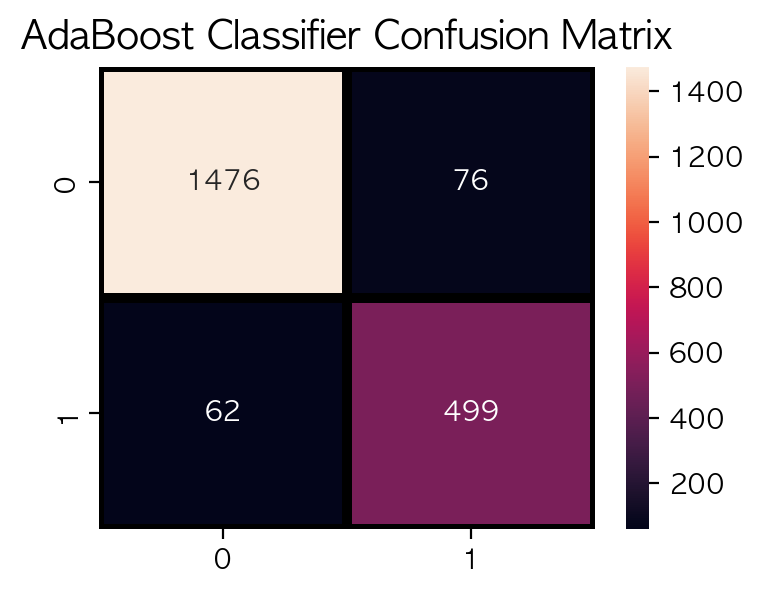

In [289]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds_aba),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

####  훈련 세트와 테스트 세트 간의 성능 비교

In [290]:
# 훈련 세트와 테스트 세트 간의 성능 비교
model_ada = AdaBoostClassifier(base_estimator=base_estimator, learning_rate=0.01, n_estimators=5, algorithm='SAMME', random_state=12345)
model_ada.fit(X_train, y_train)

# 훈련 세트에서의 정확도 계산
train_accuracy = model_ada.score(X_train, y_train)

# 테스트 세트에서의 정확도 계산
test_accuracy = model_ada.score(X_test, y_test)

# 결과 출력
print("훈련 세트 정확도:", train_accuracy)
print("테스트 세트 정확도:", test_accuracy)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=50),
                   learning_rate=0.01, n_estimators=5, random_state=12345)

훈련 세트 정확도: 1.0
테스트 세트 정확도: 0.934690014197823


* 훈련 세트 정확도: 0.9580121703853955
* 테스트 세트 정확도: 0.9503076194983436

    * (위는 인코딩 전 값)원-핫 인코딩 전보다 훈련세트 정확도는 조금 감소, 테스트 세트 정확도는 조금 증가하는 경향

####  Cross Validation Score for AdaBoost

In [291]:
scores = cross_val_score(model_ada, X, y, cv=3, scoring='f1')
print(scores)
print(f"AdaBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.82618182 0.86486486 0.87346939]
AdaBoost F1_score: 85.48% +/- (2.06)


#### 학습 곡선(Learning Curve)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Learning Curve')

Text(0.5, 0, 'Training Examples')

Text(0, 0.5, 'Score')

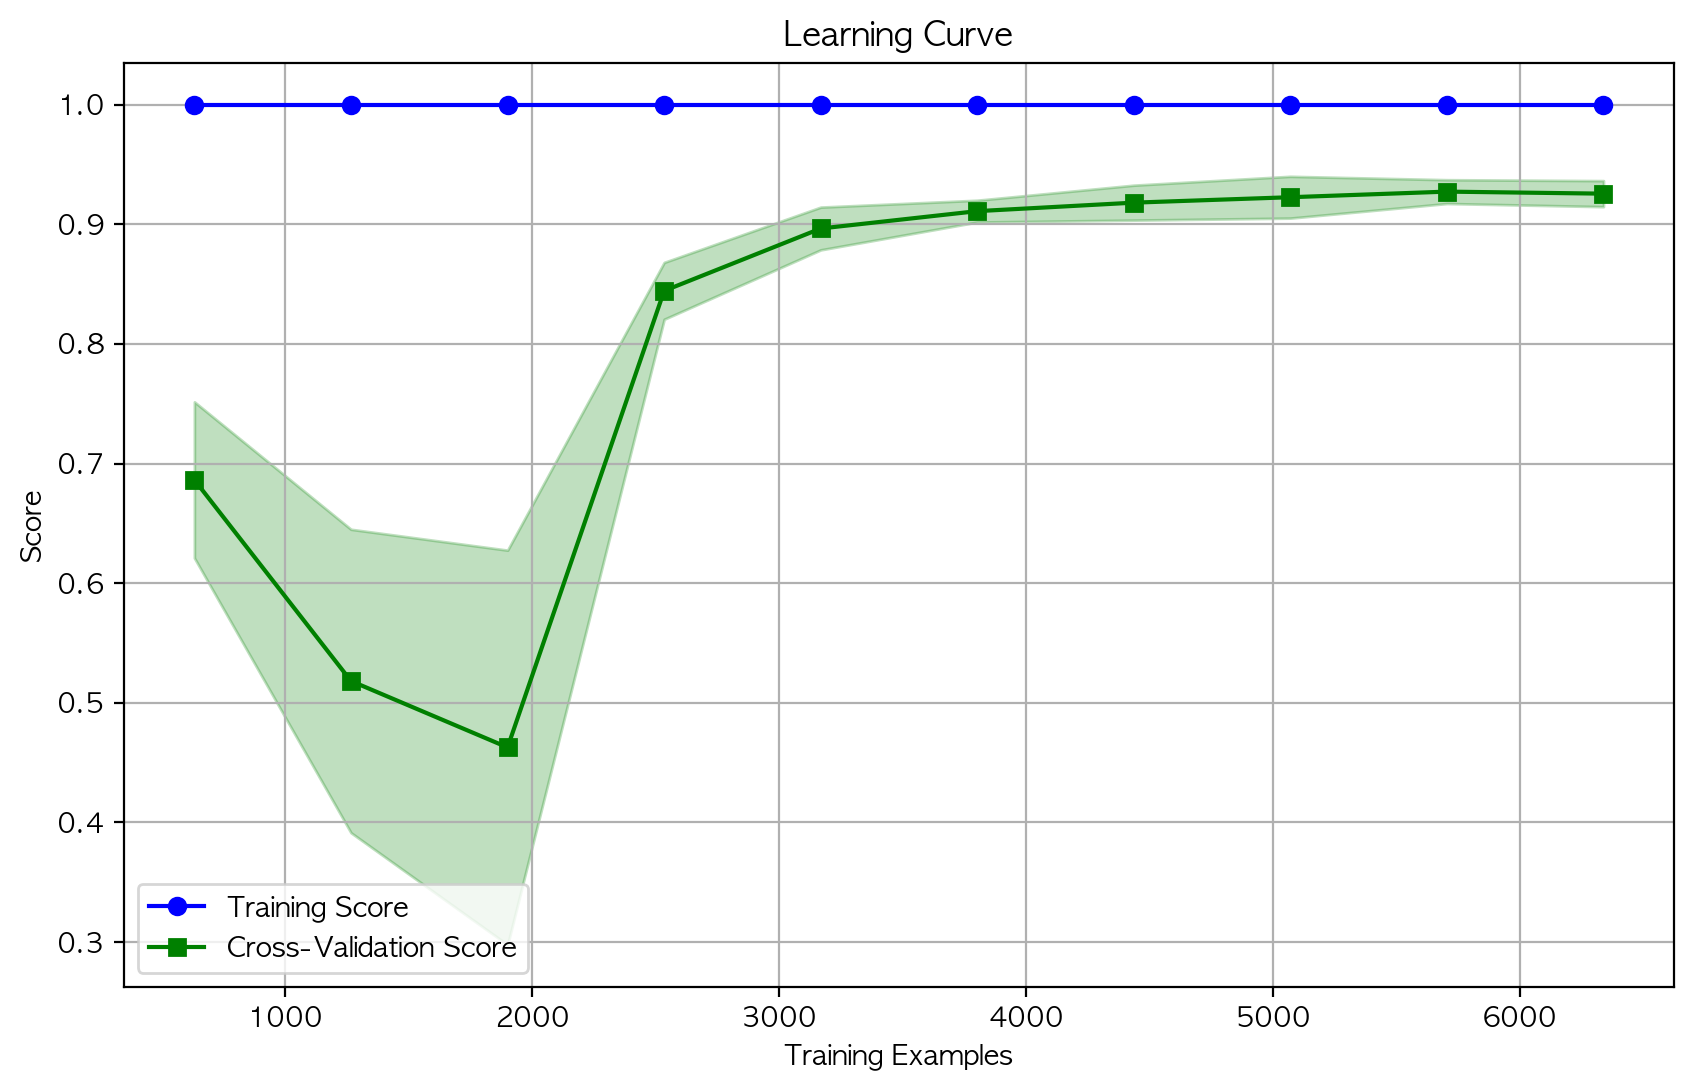

In [292]:
# 학습 곡선을 그릴 모델과 데이터를 준비합니다
# model: 학습할 모델 (예: Logistic Regression, Decision Tree, 등)
# X: 특성 데이터 (Feature data)
# y: 목표 변수 (Target variable)

# learning_curve 함수를 사용하여 학습 곡선 데이터를 생성합니다
train_sizes, train_scores, test_scores = learning_curve(model_ada, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=10)

# train_sizes: 학습 데이터 크기의 배열
# train_scores: 훈련 데이터에서의 성능 점수
# test_scores: 테스트 데이터에서의 성능 점수

# 평균과 표준 편차를 계산합니다
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 학습 곡선을 그립니다
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.25)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.25)

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

* 학습 곡선은 크게 차이가 없었음.

In [168]:
# model_ada = AdaBoostClassifier(n_estimators=50, random_state=12345)
# model_ada.fit(X_train,y_train)

# # 테스트 데이터에 대한 예측 및 클래스 확률 예측
# preds_aba = model_ada.predict(X_test)
# # probs_ada = model_ada.predict_proba(X_test)

# # 정확도 계산
# accuracy_ada = accuracy_score(y_test, preds_aba)

AdaBoostClassifier(random_state=12345)

In [293]:
# report for model evaluation
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, precision_recall_curve

def model_report(model_ada):
    y_pred = model_ada.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    # AUC - ROC curve
    y_score = model_ada.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    model_ada_roc_auc = roc_auc_score(y_test, y_pred)
    model_ada_f1_score_macro = precision_recall_fscore_support(y_test, y_pred, average="macro")[2]
    model_ada_f1_score_weighted = precision_recall_fscore_support(y_test, y_pred, average="weighted")[2]
    model_ada_sensitivity = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1)[0]
    model_ada_specificity = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=0)[0]
    model_ada_precision = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1)[1]
    print("Confusion Matrix\n", cm, "\n")
    print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))
    print("Accuracy Score      : ", accuracy_score(y_test, y_pred).round(4))
    print("Area Under Curve    : ", model_ada_roc_auc.round(4))
    print("F1 Score (macro)    : ", model_ada_f1_score_macro.round(4))
    print("F1 Score (weighted) : ", model_ada_f1_score_weighted.round(4))
    print("Sensitivity         : ", model_ada_sensitivity.round(4))
    print("Specificity         : ", model_ada_specificity.round(4))
    print("Precision           : ", model_ada_precision.round(4), "\n")

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Confusion Matrix
 [[1476   76]
 [  62  499]] 

              precision    recall  f1-score   support

    No Churn       0.96      0.95      0.96      1552
       Churn       0.87      0.89      0.88       561

    accuracy                           0.93      2113
   macro avg       0.91      0.92      0.92      2113
weighted avg       0.94      0.93      0.93      2113

Accuracy Score      :  0.9347
Area Under Curve    :  0.9203
F1 Score (macro)    :  0.9169
F1 Score (weighted) :  0.9349
Sensitivity         :  0.8678
Specificity         :  0.9597
Precision           :  0.8895 



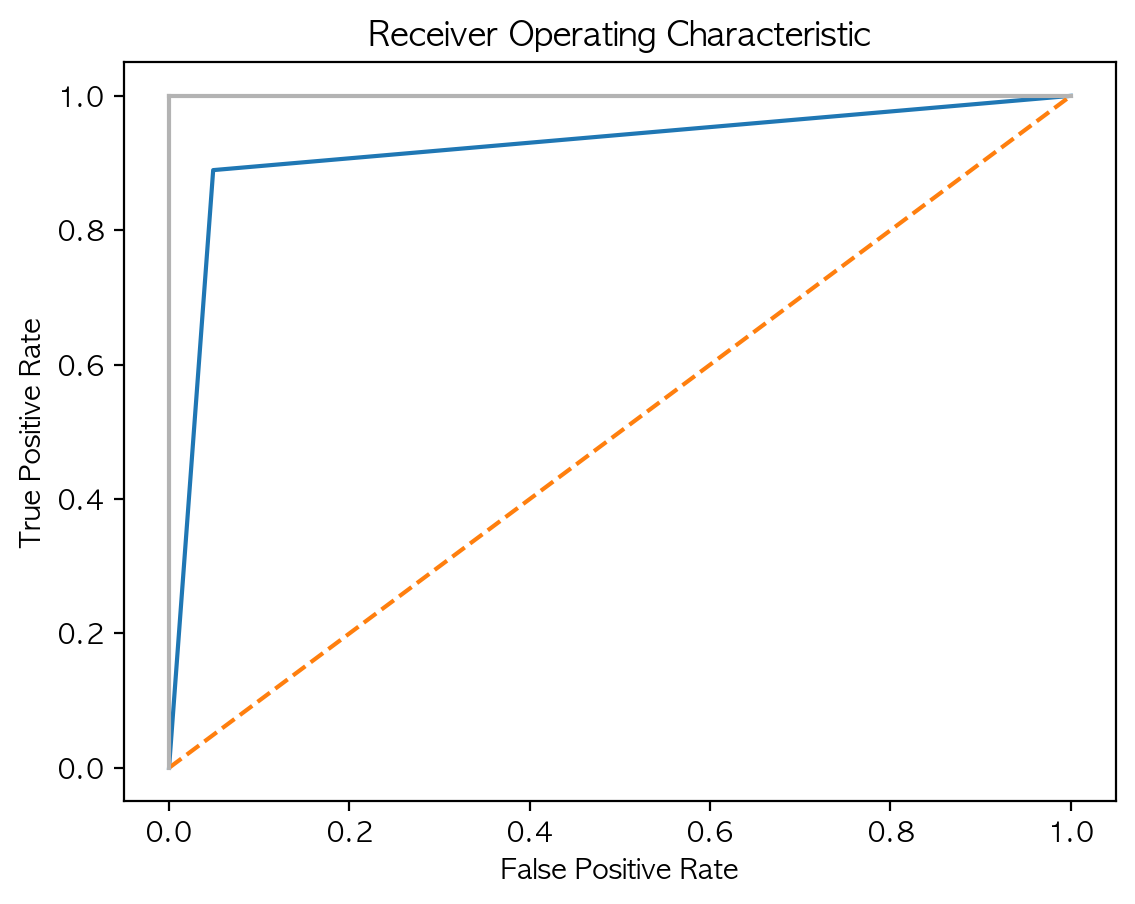

In [254]:
model_report(model_ada)

#### F 1.5, F2 Score 추출

In [294]:
from sklearn.metrics import fbeta_score

def model_report(model_ada):
    y_pred = model_ada.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # AUC - ROC curve
    y_score = model_ada.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    model_ada_roc_auc = roc_auc_score(y_test, y_pred)
    
    model_ada_f1_score_macro = precision_recall_fscore_support(y_test, y_pred, average="macro")[2]
    model_ada_f1_score_weighted = precision_recall_fscore_support(y_test, y_pred, average="weighted")[2]
    
    model_ada_sensitivity = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1)[0]
    model_ada_specificity = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=0)[0]
    model_ada_precision = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1)[1]
    
    # F1.5 Score 계산
    beta_1_5 = 1.5
    model_ada_f1_5_score = fbeta_score(y_test, y_pred, beta=beta_1_5)
    
    # F2 Score 계산
    beta_2 = 2
    model_ada_f2_score = fbeta_score(y_test, y_pred, beta=beta_2)
    
    print("Confusion Matrix\n", cm, "\n")
    print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))
    print("Accuracy Score      : ", accuracy_score(y_test, y_pred).round(4))
    print("Area Under Curve    : ", model_ada_roc_auc.round(4))
    print("F1 Score (macro)    : ", model_ada_f1_score_macro.round(4))
    print("F1 Score (weighted) : ", model_ada_f1_score_weighted.round(4))
    print(f"F{beta_1_5} Score         : ", model_ada_f1_5_score.round(4))
    print(f"F{beta_2} Score         : ", model_ada_f2_score.round(4))
    print("Sensitivity         : ", model_ada_sensitivity.round(4))
    print("Specificity         : ", model_ada_specificity.round(4))
    print("Precision           : ", model_ada_precision.round(4), "\n")

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Confusion Matrix
 [[1476   76]
 [  62  499]] 

              precision    recall  f1-score   support

    No Churn       0.96      0.95      0.96      1552
       Churn       0.87      0.89      0.88       561

    accuracy                           0.93      2113
   macro avg       0.91      0.92      0.92      2113
weighted avg       0.94      0.93      0.93      2113

Accuracy Score      :  0.9347
Area Under Curve    :  0.9203
F1 Score (macro)    :  0.9169
F1 Score (weighted) :  0.9349
F1.5 Score         :  0.8827
F2 Score         :  0.8851
Sensitivity         :  0.8678
Specificity         :  0.9597
Precision           :  0.8895 



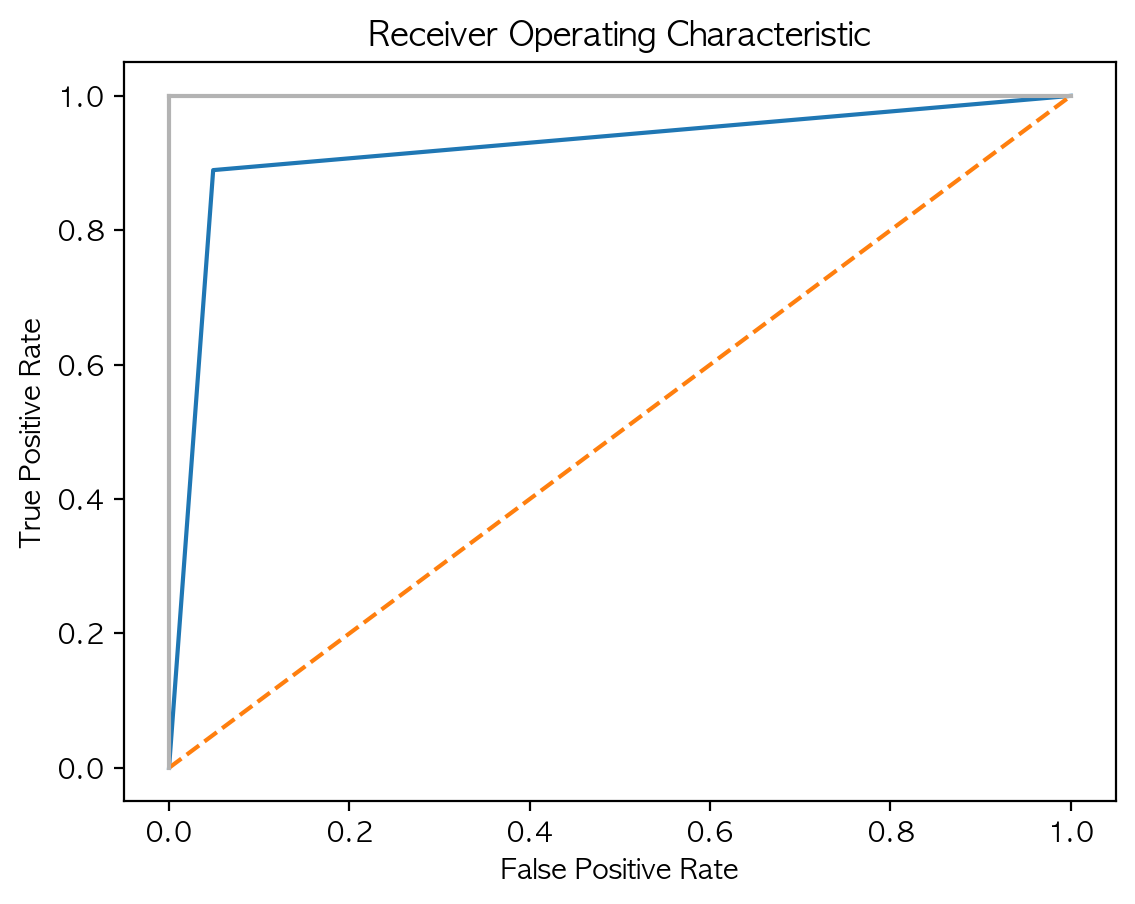

In [257]:
model_report(model_ada)

### 전체 모델 스코어 추출해보기 

In [97]:
# models = [
#     ('LR', LogisticRegression(random_state=12345)),
#     ('KNN', KNeighborsClassifier()),
#     ('DT', DecisionTreeClassifier(max_depth=8, random_state=12345)),
#     ('RF', RandomForestClassifier(random_state=12345)),
#     ('ADA', AdaBoostClassifier(n_estimators=50, random_state=12345)),
#     ('SGD', SGDClassifier(loss='log', max_iter=1000, alpha=0.0001, random_state=12345))
# ]

In [98]:
# last_models_metrics = []

In [99]:
# for name, model in models:
#     cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    
#     accuracy = round(cv_results['test_accuracy'].mean(), 16)
#     auc = round(cv_results['test_roc_auc'].mean(), 16)
#     recall = round(cv_results['test_recall'].mean(), 16)
#     precision = round(cv_results['test_precision'].mean(), 16)
#     f1 = round(cv_results['test_f1'].mean(), 16)
    
#     last_models_metrics.append({
#         "Model": name,
#         "Accuracy": accuracy,
#         "AUC": auc,
#         "Recall": recall,
#         "Precision": precision,
#         "F1": f1
#     })
    
#     print(f"########## {name} ##########")
#     print(f"Accuracy: {accuracy}")
#     print(f"AUC: {auc}")
#     print(f"Recall: {recall}")
#     print(f"Precision: {precision}")
#     print(f"F1: {f1}")

########## LR ##########
Accuracy: 0.9382365394541584
AUC: 0.9809897538734746
Recall: 0.8298447334088401
Precision: 0.9312624131415062
F1: 0.8759310479877394
########## KNN ##########
Accuracy: 0.7665788921865927
AUC: 0.7385799834818126
Recall: 0.4200083152929707
Precision: 0.5880477791409877
F1: 0.4881621918793466
########## DT ##########
Accuracy: 0.9162367330150334
AUC: 0.9546061458560388
Recall: 0.8720978910696621
Precision: 0.8711728993949424
F1: 0.8578716077109776
########## RF ##########
Accuracy: 0.9288717215626814
AUC: 0.9793833300756662
Recall: 0.8763831342919814
Precision: 0.8906726874614048
F1: 0.8738968804609847
########## ADA ##########
Accuracy: 0.9141096804632556
AUC: 0.9874959855093064
Recall: 0.8919011913807688
Precision: 0.8583345739193613
F1: 0.860260792787275
########## SGD ##########
Accuracy: 0.6873099675785534
AUC: 0.6844537138985896
Recall: 0.4882338604464452
Precision: 0.6246169756538542
F1: 0.4556258435425164


* Accuracy, Precision, F1: LR
* AUC, Recall, : ADA

In [137]:
# # Dictionary containing the updated metric results
# metrics = {
#     "Model": ["LR", "KNN", "DT", "RF", "ADA"],
#     "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
#                  last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
#                  last_models_metrics[4]['Accuracy']],
#     "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
#             last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
#             last_models_metrics[4]['AUC']],
#     "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
#                last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
#                last_models_metrics[4]['Recall']],
#     "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
#                   last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
#                   last_models_metrics[4]['Precision']],
#     "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
#            last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
#            last_models_metrics[4]['F1']]
# }

# # Creating a DataFrame from the updated metrics dictionary
# results_df = pd.DataFrame(metrics)

# # Sorting the DataFrame by accuracy in descending order
# results_df = results_df.sort_values(by="Accuracy", ascending=False)

# # Creating the figure for the graph
# fig = go.Figure()

# # Colors for the metrics
# colors = ["purple", "green", "blue", "orange", "red"]

# # Adding traces for each metric in the specified order
# for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
#     fig.add_trace(go.Bar(
#         x=results_df["Model"],
#         y=results_df[metric],
#         marker_color=color,
#         name=metric,
#         text=results_df[metric],
#         textposition='auto'
#     ))

# # Setting axis labels and title
# fig.update_layout(
#     xaxis_title="Model",
#     yaxis_title="Metric Score",
#     title="Comparison of Metrics for Different Models After Feature Engineering"
# )

# # Displaying the graph
# fig.show(block=True)

#### Feature Importance

In [138]:
# models = [
#     ('LR', LogisticRegression(random_state=12345)),
#     ('KNN', KNeighborsClassifier()),
#     ('DT', DecisionTreeClassifier(max_depth=8, random_state=12345)),
#     ('RF', RandomForestClassifier(random_state=12345)),
#     ('ADA', AdaBoostClassifier(n_estimators=50, random_state=12345)),
#     ('SGD', SGDClassifier(loss='log', max_iter=1000, alpha=0.0001, random_state=12345))
# ]

LogisticRegression(random_state=12345)

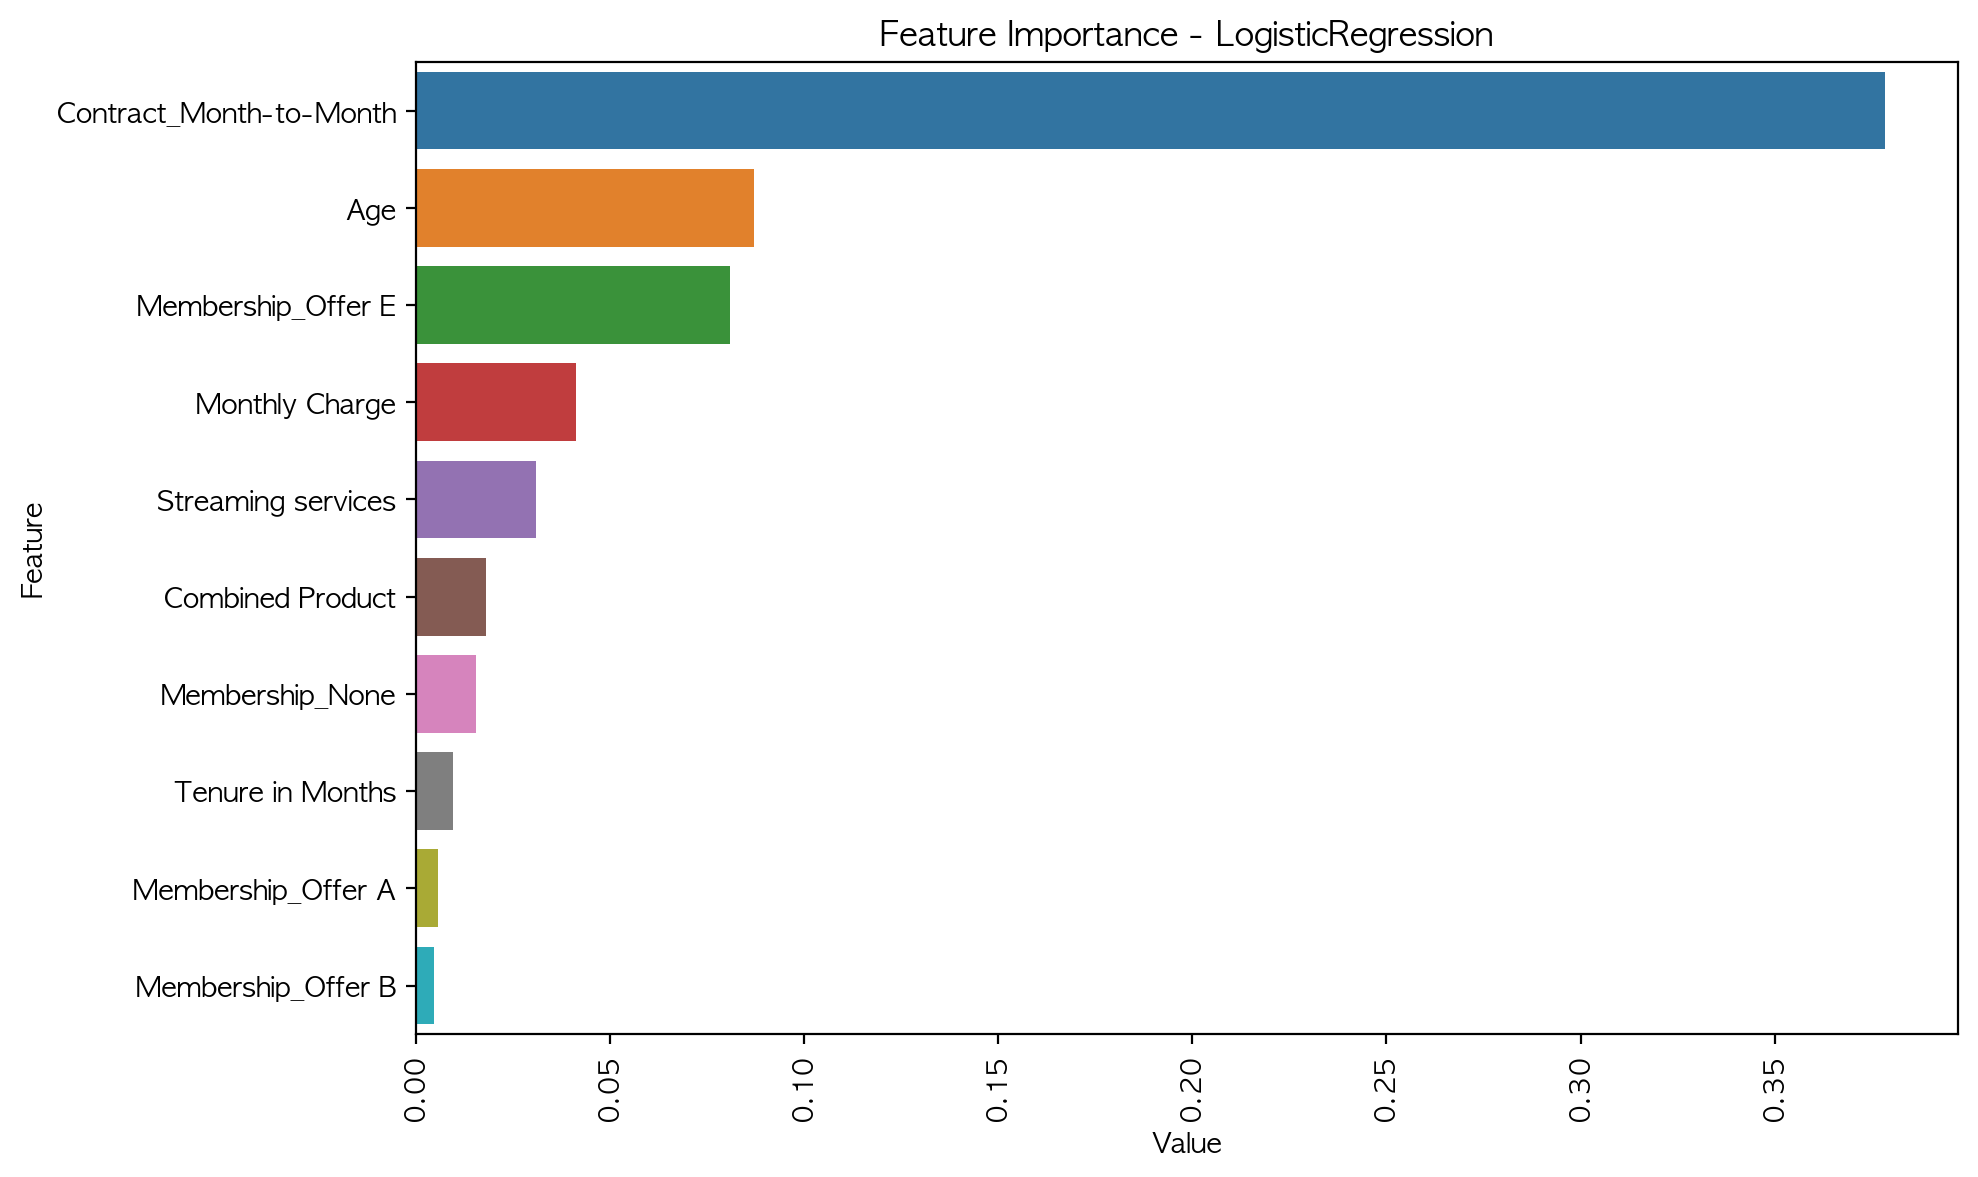

KNeighborsClassifier()

DecisionTreeClassifier(max_depth=8, random_state=12345)

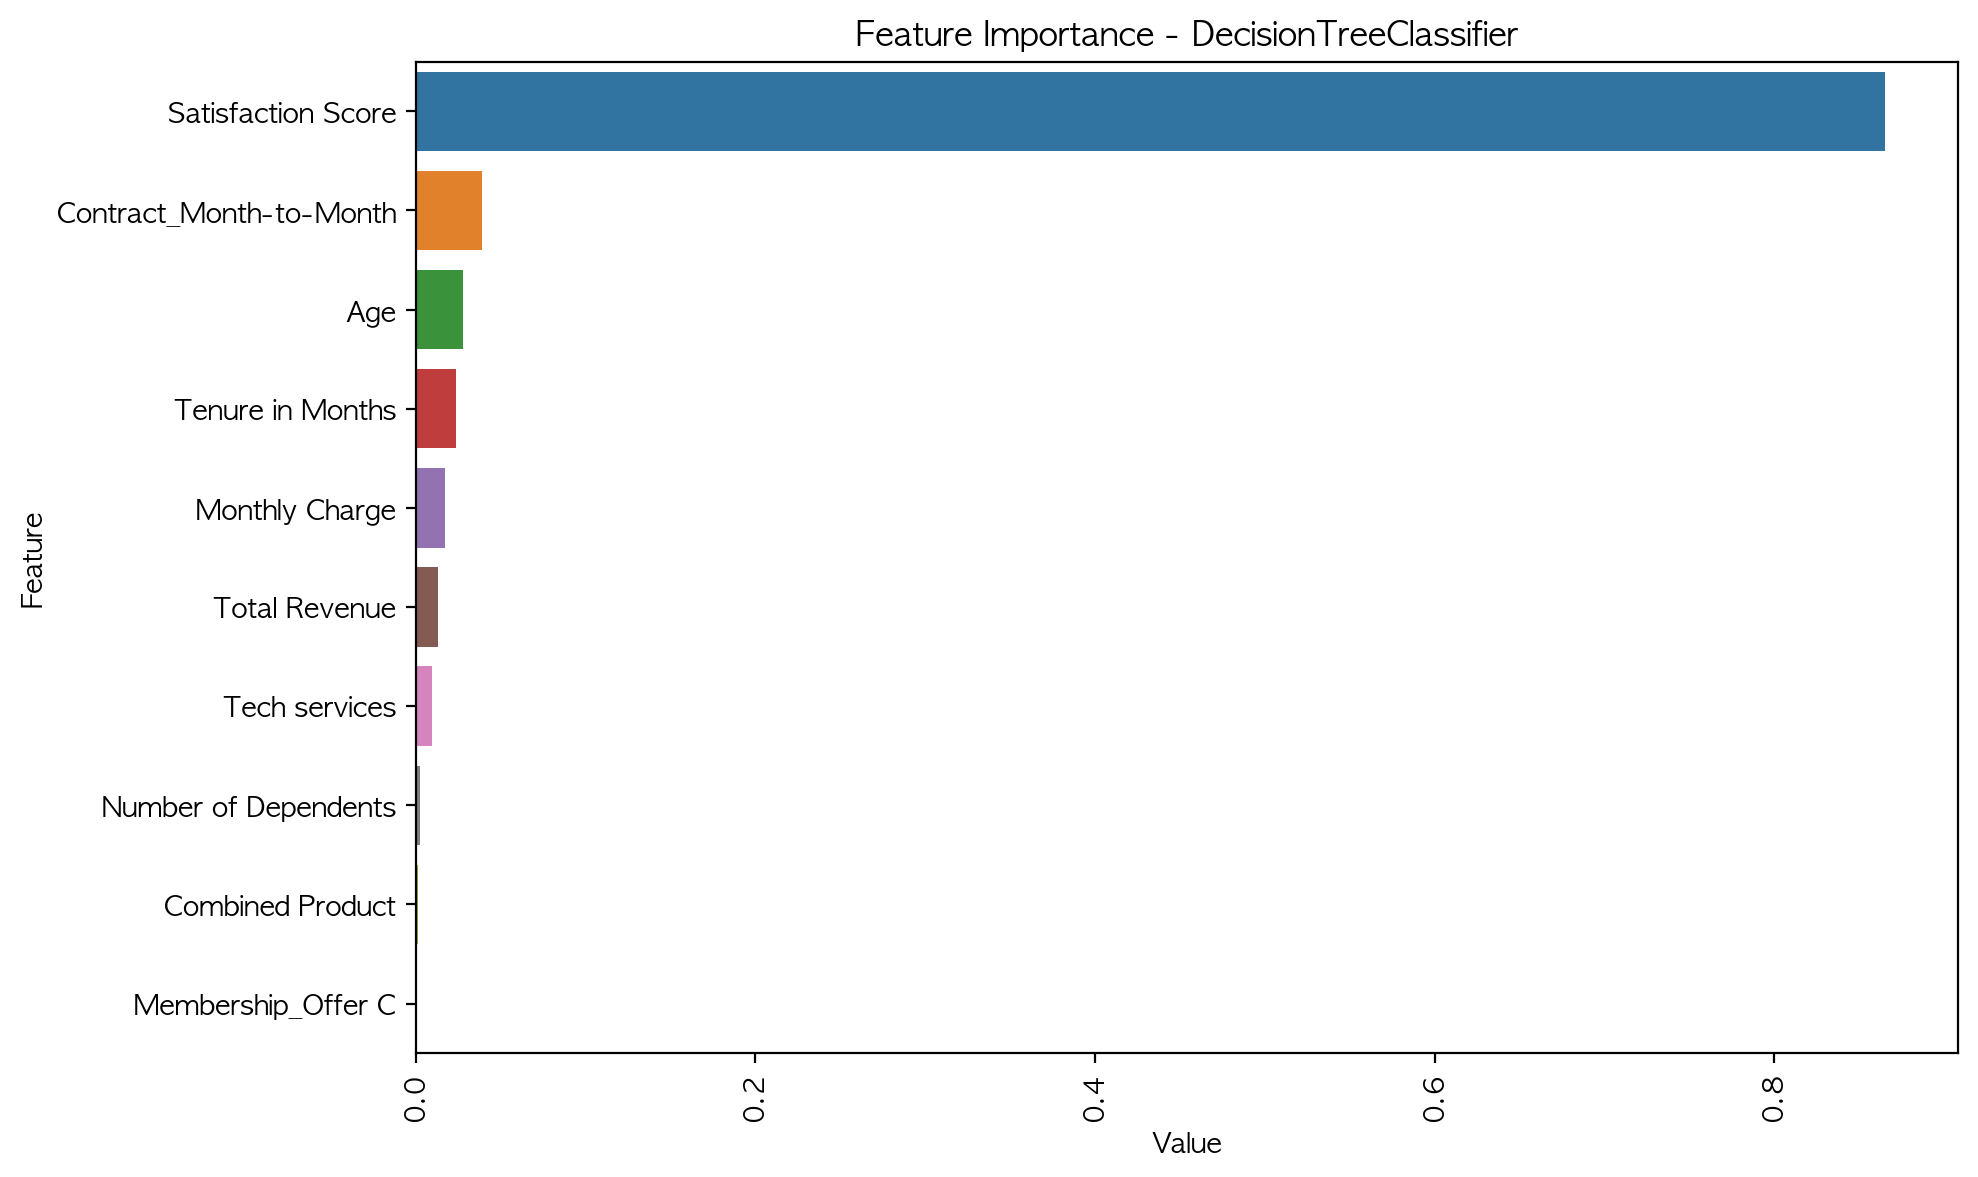

RandomForestClassifier(random_state=12345)

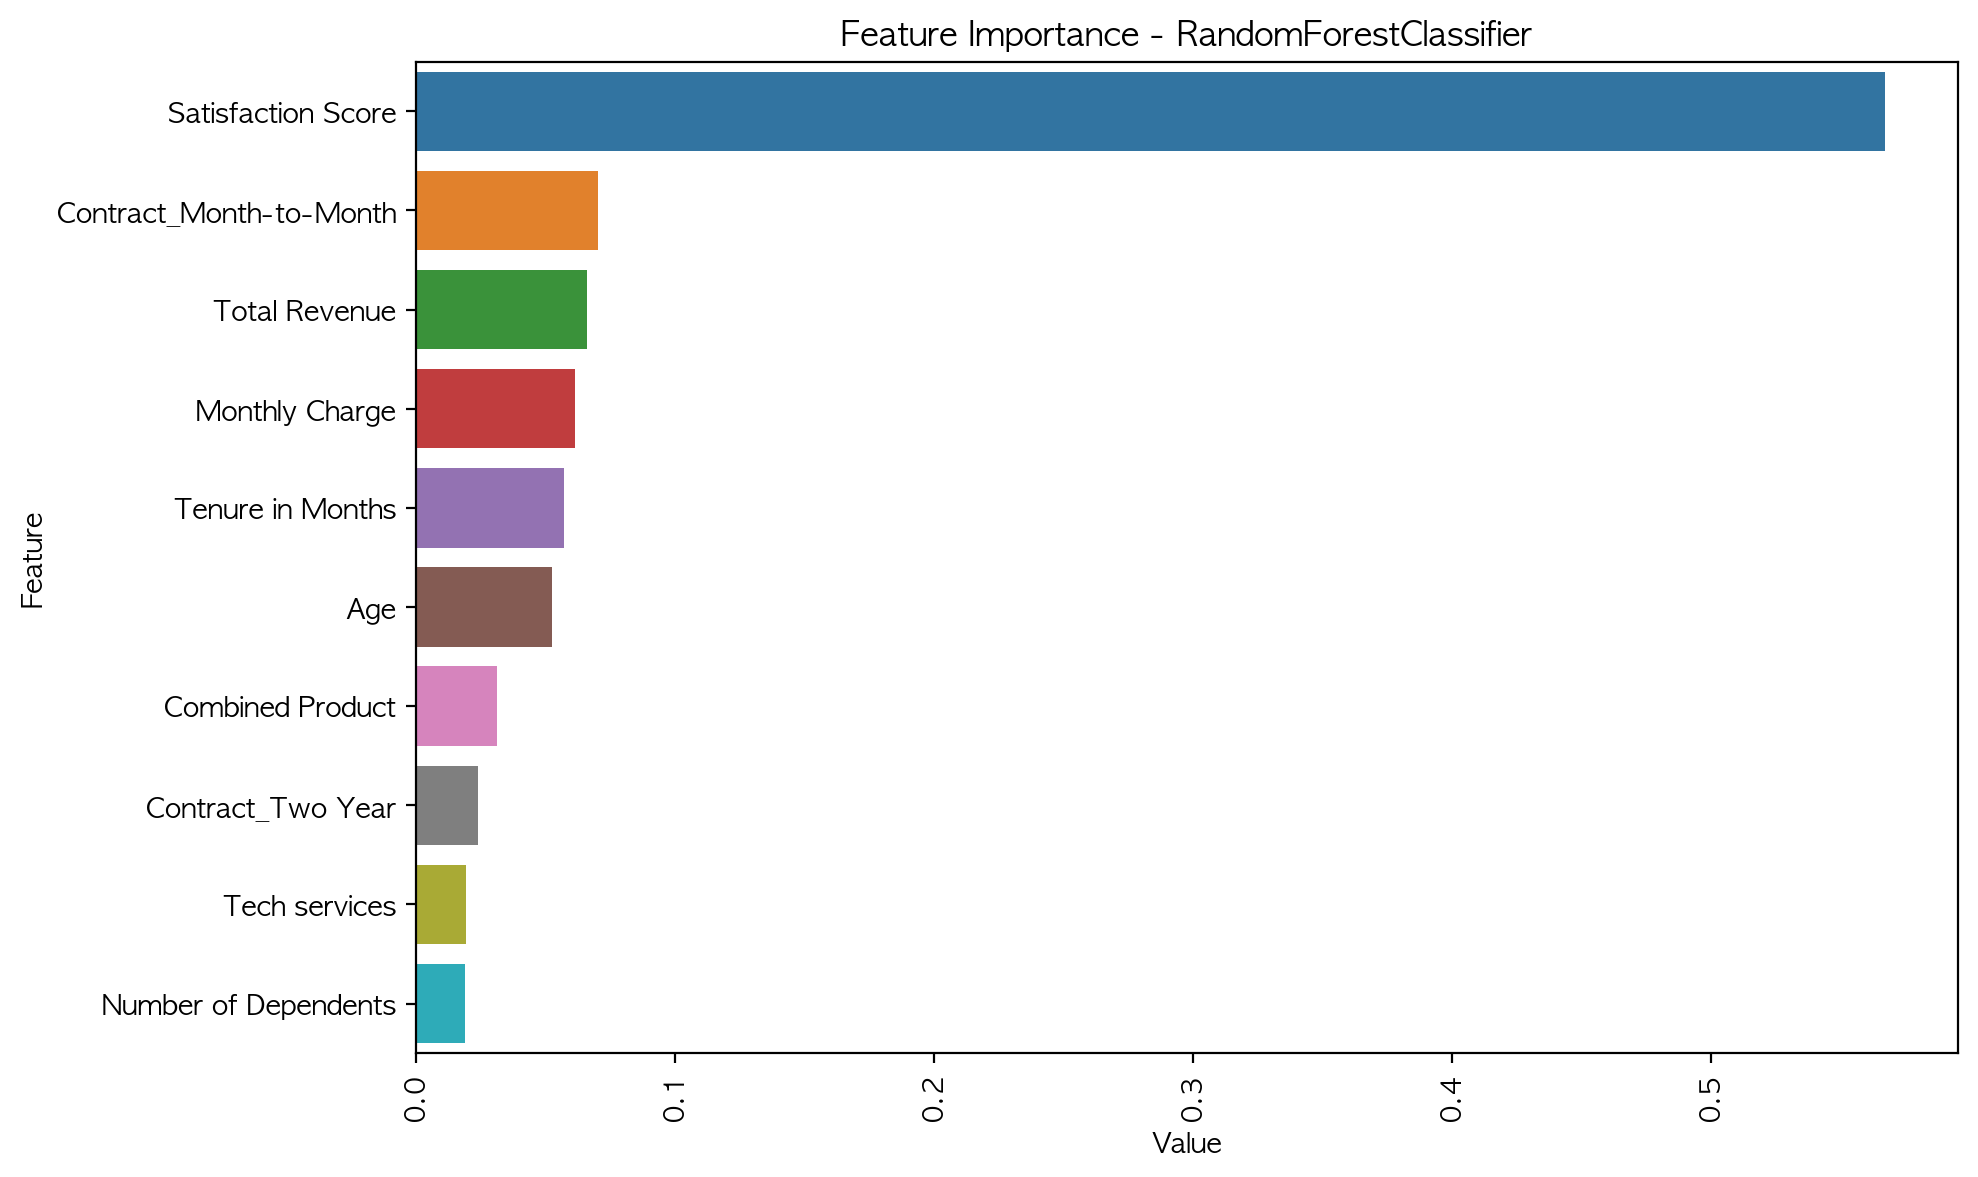

AdaBoostClassifier(random_state=12345)

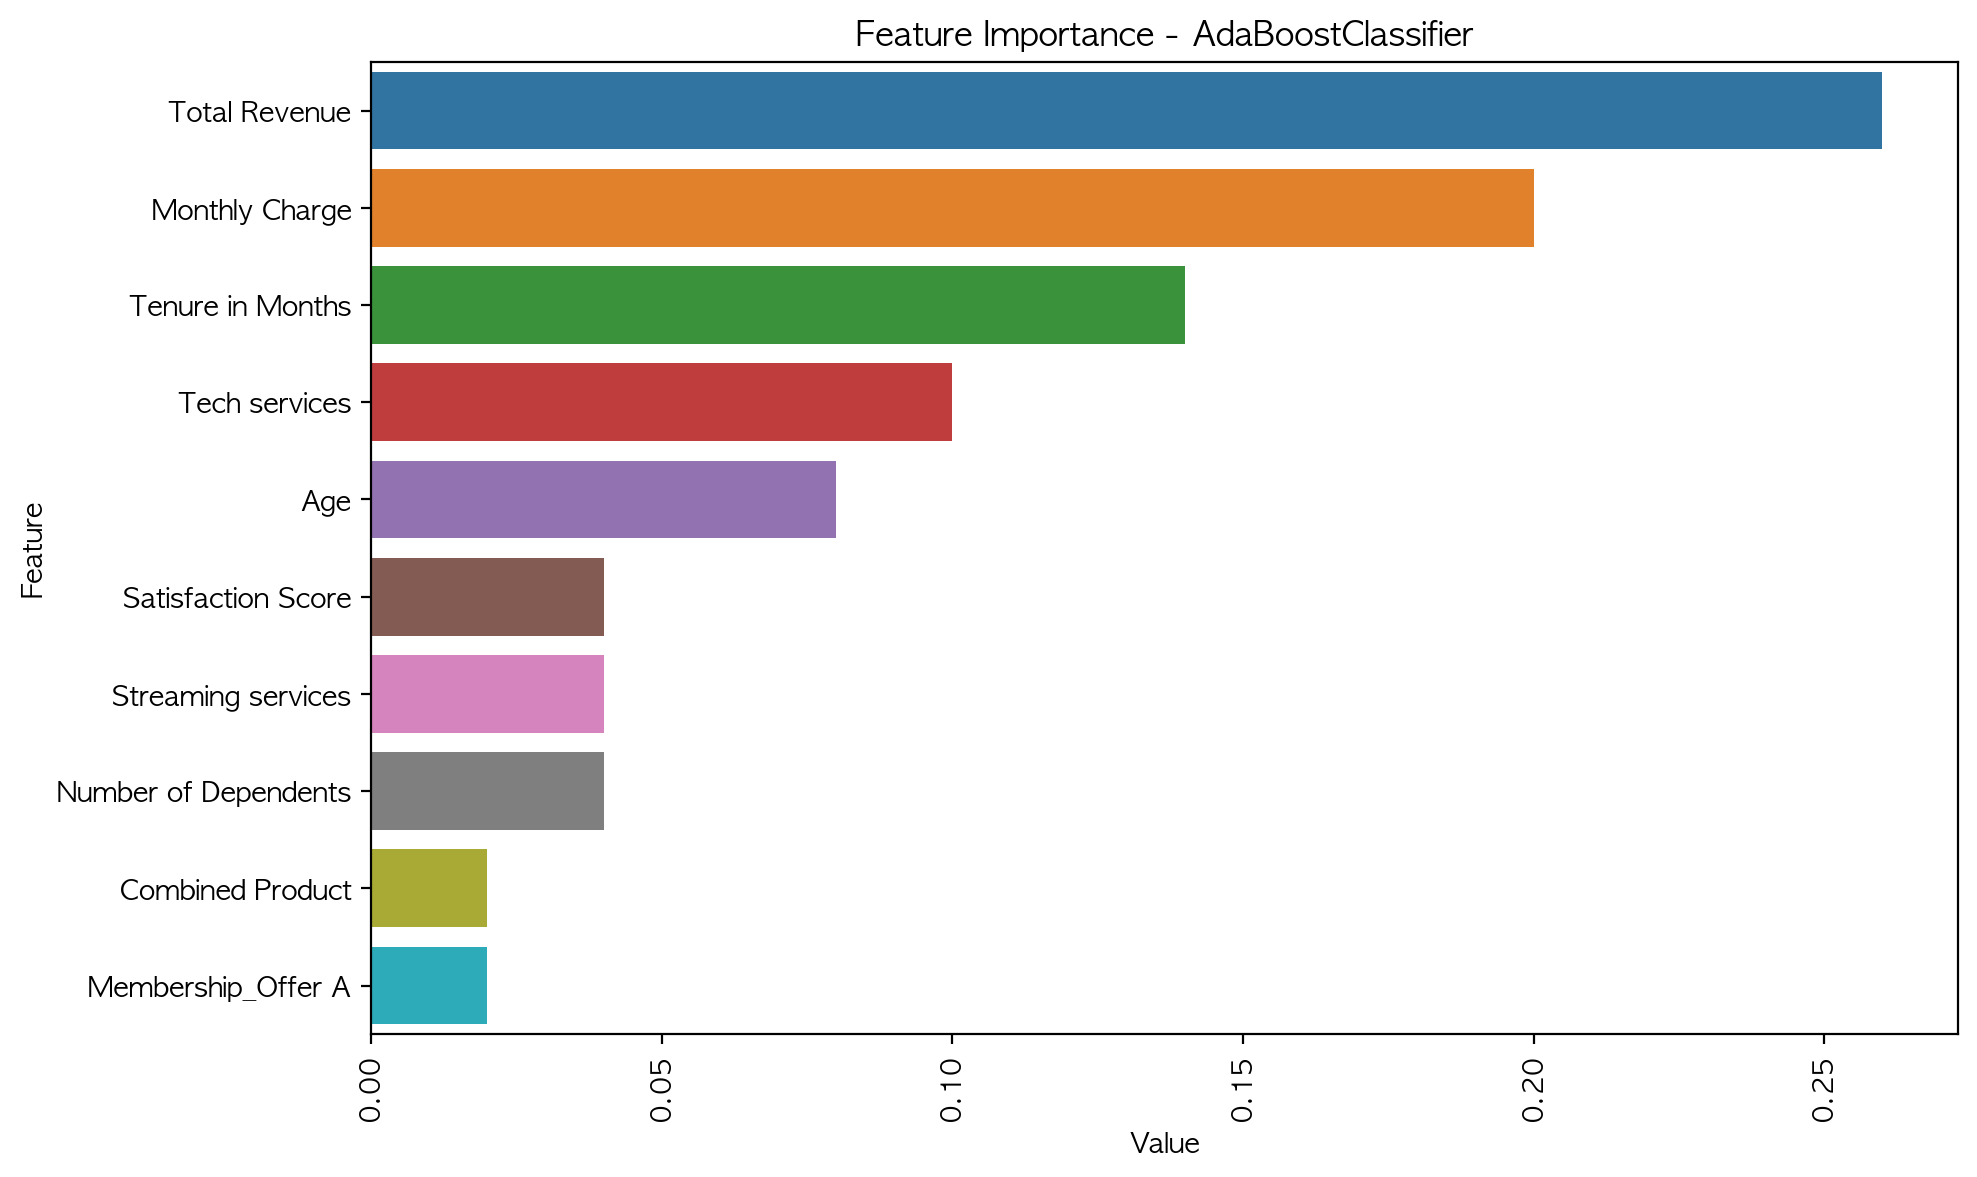

SGDClassifier(loss='log', random_state=12345)

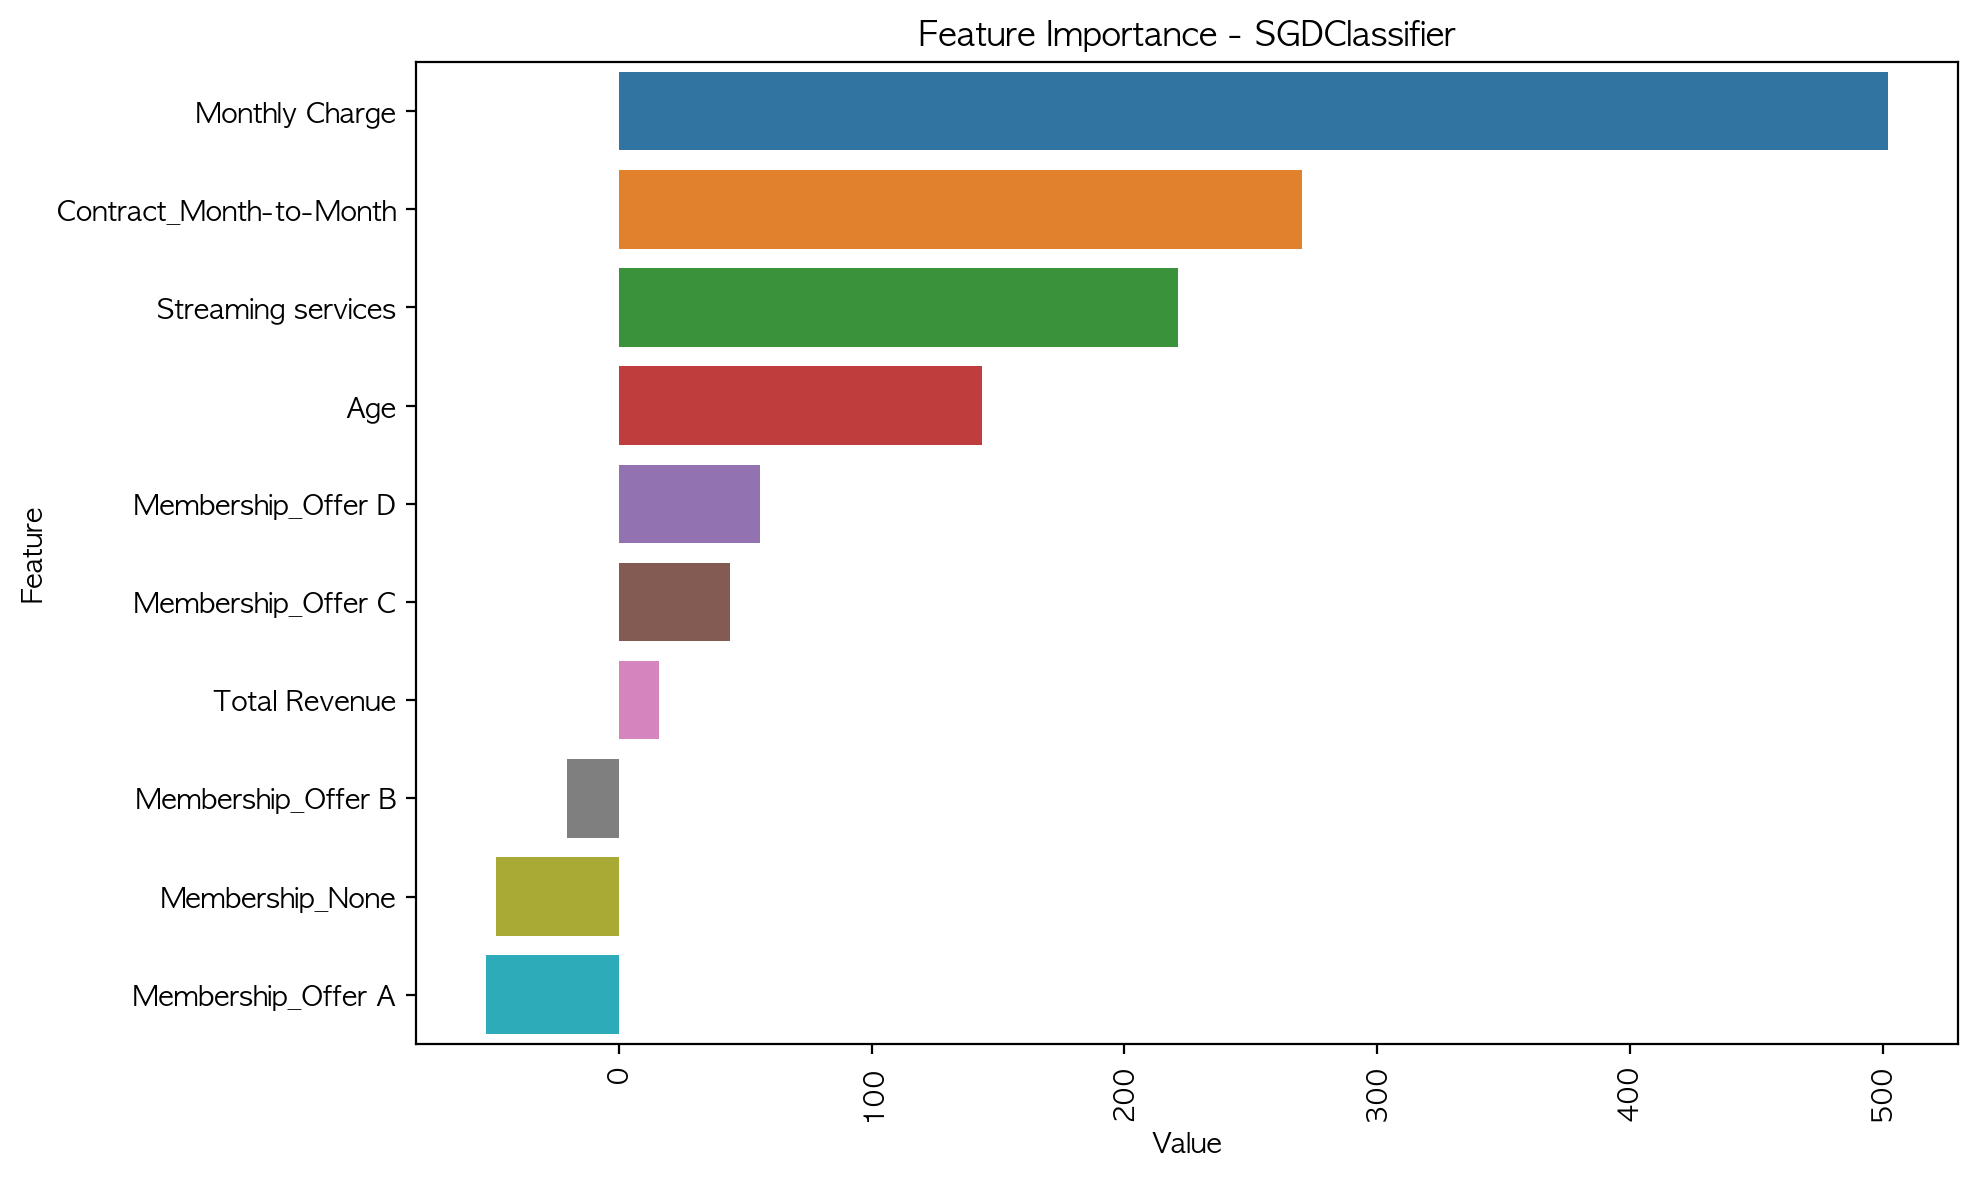

In [139]:
# def plot_importance(model, features, num=10, save=False):
#     try:
#         importance = model.feature_importances_
#         feature_names = features.columns
#     except AttributeError:
#         try:
#             importance = model.coef_[0]
#             feature_names = features.columns
#         except AttributeError:
#             return

#     feature_imp = pd.DataFrame({'Value': importance, 'Feature': feature_names})
#     feature_imp = feature_imp.sort_values(by="Value", ascending=False)
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x="Value", y="Feature", data=feature_imp.iloc[:num])
#     plt.title(f'Feature Importance - {model.__class__.__name__}')
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     if save:
#         plt.savefig(f'importances_{model.__class__.__name__}.png')
#     plt.show()

# for model_name, model in models:
#     model.fit(X, y)
#     plot_importance(model, X)